## Check GPU enabled

In [1]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

2024-03-21 22:41:07.113005: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 22:41:07.113067: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 22:41:07.113969: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-21 22:41:07.119539: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-21 22:41:07.730436: W tensorflow/compiler/tf2

1 Physical GPUs, 1 Logical GPUs


2024-03-21 22:41:08.237554: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-21 22:41:08.267150: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-21 22:41:08.267349: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

'''
should be ['/device:CPU:0', '/device:GPU:0']
not ['/device:CPU:0']
'''

['/device:CPU:0', '/device:GPU:0']


2024-03-21 22:41:08.332079: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-21 22:41:08.332265: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-21 22:41:08.332386: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

"\nshould be ['/device:CPU:0', '/device:GPU:0']\nnot ['/device:CPU:0']\n"

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Imports

In [4]:
import re

In [5]:
import tensorflow as tf
import tensorflow_text as text

In [6]:
from tensorflow import keras
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import layers
from tensorflow import data

In [7]:
import pandas as pd
import numpy as np

In [8]:
import pickle

## Data 

In [ ]:
'''
Загрузка датасета, уменьшение обучающей выборки до 20к строк из-за недостатка ресурсов

keras_dataset - полный датасет на 106793 строк
keras_dataset_short - датасет на 20000 строк
'''

In [9]:
dataset = pd.read_csv('datas/data_fant.txt')

In [10]:
dataset.head()

,description
0,множество творений дивных и странных оставалос...
1,агдалон мы все ждем тебя сейчас капитан сейча...
2,смерть глядит ему в самые очи и ухмыляется гн...
3,брызги уха разлетаются во все стороны гоблин ...
4,на кончике вяло загорается пламя затем хлопае...


In [11]:
print(dataset.shape)
dataset = dataset.drop_duplicates(subset='description').dropna()
print(dataset.shape)

(110763, 1)
(106793, 1)


In [12]:
keras_dataset = tf.data.Dataset.from_tensor_slices((dataset))

In [13]:
dataset_short = dataset.iloc[:20000]

In [14]:
keras_dataset_short = tf.data.Dataset.from_tensor_slices((dataset_short))

# Do train_dataset

In [ ]:
'''
Разобью датасет на 90% трейна и 10% валида
'''

In [15]:
n = int(0.9 * len(dataset))  
train_examples = dataset[:n]
val_examples = dataset[n:]

In [16]:
n = int(0.9 * len(dataset_short))  
train_examples_short = dataset_short[:n]
val_examples_short = dataset_short[n:]

In [17]:
dataset.description.apply(type).value_counts()

description
<class 'str'>    106793
Name: count, dtype: int64

In [18]:
train_examples = tf.data.Dataset.from_tensor_slices((train_examples))
val_examples = tf.data.Dataset.from_tensor_slices((val_examples))

In [19]:
train_examples_short = tf.data.Dataset.from_tensor_slices((train_examples_short))
val_examples_short = tf.data.Dataset.from_tensor_slices((val_examples_short))

# Subword tokenizer

In [ ]:
'''
Загружу и проверю токейнайзер.
В ноутбуке остались закомментированными строки, которые позволяют откатиться к версии с этим токенизатором. 
'''

In [39]:
model_name = 'ru_tokenizer'
tokenizers = tf.saved_model.load(model_name)
tokenizers.ru.get_vocab_size().numpy()

7653

In [40]:
vocab_size = tokenizers.ru.get_vocab_size().numpy()

In [41]:
[item for item in dir(tokenizers.ru) if not item.startswith('_')]

['detokenize',
 'get_reserved_tokens',
 'get_vocab_path',
 'get_vocab_size',
 'lookup',
 'tokenize',
 'tokenizer',
 'vocab']

In [42]:
print('> This is a batch of strings:')
for ru_ex in keras_dataset.batch(3).take(1):
  for ru in ru_ex.numpy():
    for i in ru:
      print(i.decode('utf-8'))

> This is a batch of strings:
множество творений дивных и странных оставалось еще в мире но немало было и лихого жуткого орки тролли драконы и хищные твари в лесах бродили неведомые и мудрые создания гномы трудились в горах терпеливым искусством творя из металла и камня вещи которым не было равных но близилось владычество людей и все менялось вороток на баллисте никак не хотел отпустить тетиву беатор в отчаянии ковырял его ножом впрочем безо всякого успеха эльф опустошил половину колчана и ни разу не промахнулся но его стрелы одна за другой отскакивали от гоблинских доспехов кое что кажется застряло во вражьей шкуре но что им исчадью ангмара эльфийские стрелы не страшнее шильных тычков заговоренные что ли с суеверным ужасом бормочет кэбидж свинцовые шарики из его пращи отлетают от громадин гоблинов не причиняя им ни малейшего вреда жуть какая гоблины переростки они же не бывают такими здоровыми просто не бывают никогда никогда 
 агдалон мы все ждем тебя сейчас капитан сейчас сейчас в с

In [43]:
print('> This is a padded-batch of token IDs:')
encoded = tokenizers.ru.tokenize(ru_ex)
for row in encoded.to_list():
  print(row)
round_trip = tokenizers.ru.detokenize(encoded)

> This is a padded-batch of token IDs:


2024-03-21 22:41:31.515184: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: StatefulPartitionedCall/RaggedFromUniformRowLength/RowPartitionFromUniformRowLength/assert_greater_equal/Assert/AssertGuard/branch_executed/_113


[1503, 26, 773, 2272, 332, 13, 600, 167, 17, 6850, 1192, 70, 11, 746, 45, 1780, 64, 17, 116, 6978, 114, 15, 656, 2006, 726, 3280, 4325, 17, 29, 5478, 150, 2467, 11, 4924, 10, 4543, 393, 40, 1165, 1753, 277, 17, 20, 3950, 4021, 4964, 561, 26, 4921, 504, 11, 2199, 3340, 3441, 2723, 6467, 58, 26, 773, 2362, 51, 5072, 17, 1083, 1346, 948, 40, 64, 24, 2492, 167, 45, 10, 139, 5264, 11, 7132, 77, 1515, 280, 17, 52, 86, 1394, 1062, 197, 41, 6754, 3819, 3985, 53, 957, 40, 347, 60, 1907, 348, 6197, 62, 10, 53, 1745, 554, 11, 3878, 702, 839, 2362, 124, 48, 4712, 620, 170, 75, 3443, 27, 6523, 44, 672, 22, 1556, 5463, 2175, 4535, 702, 124, 625, 149, 17, 85, 2427, 40, 569, 4310, 45, 48, 1214, 416, 57, 357, 60, 1639, 6079, 60, 12, 5579, 1356, 455, 87, 6523, 93, 482, 42, 498, 57, 7103, 2936, 130, 11, 270, 6948, 46, 32, 179, 627, 45, 42, 138, 17, 199, 625, 1961, 106, 5133, 330, 4986, 3035, 1214, 40, 25, 3492, 3565, 32, 2638, 167, 54, 6327, 57, 3643, 1269, 42, 116, 25, 25, 62, 686, 724, 161, 4929, 5335,

In [45]:
def decode_string(ints):
  strs = [chr(i) for i in ints]
  joined = [''.join(strs)]
  return joined

In [46]:
print('> This is the text split into tokens:')
tokens = tokenizers.ru.lookup(encoded)
joined_txt = tf.strings.reduce_join(tokens, separator=' ', axis=-1)

decoded_list = [decode_string(ex) for ex in tf.strings.unicode_decode(joined_txt, 'utf-8').numpy()]
print(decoded_list)

> This is the text split into tokens:
[['множество т ##во ##рен ##ии д ##ив ##ных и странных оставалось еще в мире но немало было и ли ##хо ##го ж ##ут ##кого орки тролли драконы и х ##ищ ##ные твари в лесах б ##род ##или не ##ве ##дом ##ые и м ##уд ##рые создания гномы т ##руд ##ились в горах тер ##пели ##вым искусство ##м т ##во ##ря из металла и камня вещи которым не было р ##ав ##ных но б ##ли ##зилось в ##лад ##ы ##чество людеи и все меня ##лось ворот ##ок на ба ##лл ##ист ##е никак не хотел от ##пустить те ##тив ##у б ##е ##ат ##ор в отчаянии ко ##вы ##ря ##л его ножом впрочем без ##о всякого у ##спех ##а эльф о ##пу ##сто ##шил половину ко ##л ##ча ##на и ни разу не про ##махнулся но его стрелы одна за другои от ##ска ##кивали от г ##об ##лин ##ских до ##спех ##ов кое что кажется за ##стр ##яло во в ##ра ##жье ##и ш ##ку ##ре но что им и ##с ##ча ##дь ##ю ан ##г ##мара эльфииские стрелы не с ##тра ##шнее ш ##иль ##ных ты ##чков за ##говор ##енные что ли с с ##у ##ев ##ер ##ным у

# Keras vectorization

In [33]:
vectorize_layer = tf.keras.layers.TextVectorization(
        max_tokens=30000)
vectorize_layer.adapt(keras_dataset_short, batch_size=None)

In [34]:
vocabulary_keras = vectorize_layer.get_vocabulary()

In [35]:
keras_vocab_size = len(vocabulary_keras)

# Make batches


In [ ]:
BUFFER_SIZE = 20000
BATCH_SIZE = 8
sequence_length = 2000

In [22]:
MAX_TOKENS=sequence_length

def prepare_batch(txt, vectorize='krs'):
    if vectorize == 'krs':
        txt_tokenized = vectorize_layer(txt)
    else:
        txt_tokenized = tokenizers.ru.tokenize(txt)     
        txt_tokenized = txt_tokenized.to_tensor()

    x = txt_tokenized[:, :-1]
    y = txt_tokenized[:, 1:]
    
    # ru = ru[:, :MAX_TOKENS]    # Trim to MAX_TOKENS. (так как я заранее разбила тексты на фрагменты до 2к символов, в повторе нет необходимости)
  
    return x, y

In [23]:
def make_batches(ds):
  return (
      ds
      .shuffle(BUFFER_SIZE)
      .batch(BATCH_SIZE)
      .map(prepare_batch, tf.data.AUTOTUNE)
      .prefetch(buffer_size=tf.data.AUTOTUNE))

In [36]:
train_batches = make_batches(train_examples)
val_batches = make_batches(val_examples)

In [37]:
train_batches_short = make_batches(train_examples_short)
val_batches_short = make_batches(val_examples_short)

In [38]:
for X_train, y_train in train_batches.take(1):
    break
print(X_train.shape)
print(y_train.shape)

(8, 154)
(8, 154)


# Pos Embedding

In [48]:
def positional_encoding(length, depth):
  depth = depth/2

  positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
  depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

  angle_rates = 1 / (10000**depths)         # (1, depth)
  angle_rads = positions * angle_rates      # (pos, depth)

  pos_encoding = np.concatenate(
      [np.sin(angle_rads), np.cos(angle_rads)],
      axis=-1) 

  return tf.cast(pos_encoding, dtype=tf.float32)

In [49]:
class PositionalEmbedding(tf.keras.layers.Layer):
  def __init__(self, vocab_size, d_model):
    super().__init__()
    self.d_model = d_model
    self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True) 
    self.pos_encoding = positional_encoding(length=2048, depth=d_model)

  def compute_mask(self, *args, **kwargs):
    return self.embedding.compute_mask(*args, **kwargs)

  def call(self, x):
    length = tf.shape(x)[1]
    x = self.embedding(x)
    # This factor sets the relative scale of the embedding and positonal_encoding.
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x = x + self.pos_encoding[tf.newaxis, :length, :]
    return x

# Attention Layers

In [50]:
class BaseAttention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

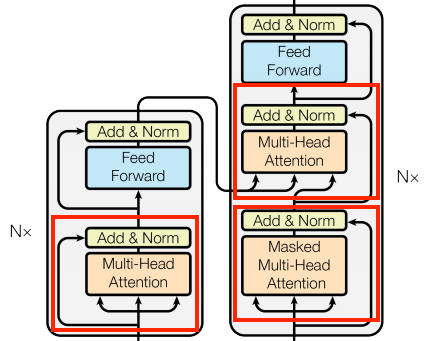

In [51]:
class CausalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output, attn_scores = self.mha(
        query=x,
        value=x,
        key=x,
        return_attention_scores=True,
        use_causal_mask = True)
    self.last_attn_scores = attn_scores
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

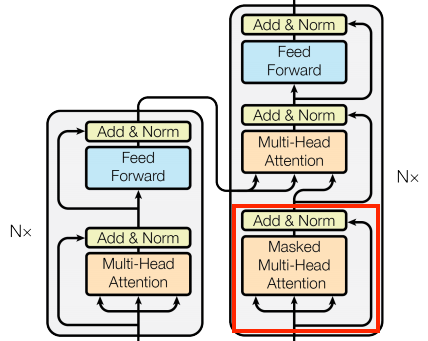

In [52]:
for x_batch, y_batch in train_batches.take(1):
    break

In [53]:
x_batch_emb = PositionalEmbedding(vocab_size=vocab_size, d_model=512)
x_batch_emb = x_batch_emb(x_batch)

In [54]:
sample_csa = CausalSelfAttention(num_heads=2, key_dim=512)

print(x_batch_emb.shape)
print(sample_csa(x_batch_emb).shape)

(8, 218, 512)
(8, 218, 512)


2024-03-21 22:41:40.388854: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


# FeedForward

In [55]:
class FeedForward(tf.keras.layers.Layer):
  def __init__(self, d_model, dff, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),
      tf.keras.layers.Dense(d_model),
      tf.keras.layers.Dropout(dropout_rate)
    ])
    self.add = tf.keras.layers.Add()
    self.layer_norm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    x = self.add([x, self.seq(x)])
    x = self.layer_norm(x) 
    return x

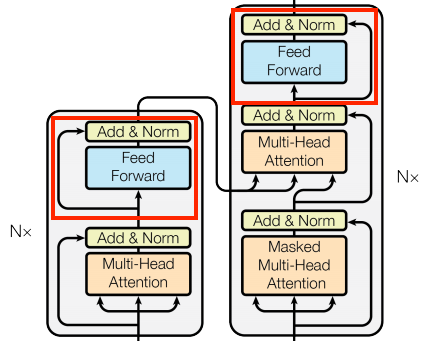

# Decoder

In [56]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self,
               *,
               d_model,
               num_heads,
               dff,
               dropout_rate=0.1):
    super(DecoderLayer, self).__init__()

    self.causal_self_attention = CausalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    # self.cross_attention = CrossAttention(
    #     num_heads=num_heads,
    #     key_dim=d_model,
    #     dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x):
    x = self.causal_self_attention(x=x)
    # x = self.cross_attention(x=x)

    # Сохранение метрик для графика
    self.last_attn_scores = self.causal_self_attention.last_attn_scores

    x = self.ffn(x)  # Shape `(batch_size, seq_len, d_model)`.
    return x

In [57]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size,
               dropout_rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size,
                                             d_model=d_model)
    self.dropout = tf.keras.layers.Dropout(dropout_rate)
    self.dec_layers = [
        DecoderLayer(d_model=d_model, num_heads=num_heads,
                     dff=dff, dropout_rate=dropout_rate)
        for _ in range(num_layers)
        ]

    self.last_attn_scores = None

  def call(self, x):
    # `x` is token-IDs shape (batch, target_seq_len)
    x = self.pos_embedding(x)  # (batch_size, target_seq_len, d_model)

    x = self.dropout(x)

    for i in range(self.num_layers):
      x  = self.dec_layers[i](x)

    self.last_attn_scores = self.dec_layers[-1].last_attn_scores

    # The shape of x is (batch_size, target_seq_len, d_model).
    return x

In [58]:
sample_decoder = Decoder(
    num_layers=4, d_model=512, num_heads=8, dff=2048, vocab_size=8000
)

output = sample_decoder(x=x_batch)

print(x_batch.shape)
print(x_batch_emb.shape)
print(output.shape)

(8, 218)
(8, 218, 512)
(8, 218, 512)


# Transformer

In [59]:
class Transformer(tf.keras.Model):
  def __init__(self, *, num_layers, d_model, num_heads, dff,
               vocab_size, 
               dropout_rate=0.1): 
    super().__init__()
    # self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
    #                        num_heads=num_heads, dff=dff,
    #                        vocab_size=vocab_size,
    #                        dropout_rate=dropout_rate)

    self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=vocab_size, 
                           dropout_rate=dropout_rate)

    self.final_layer = tf.keras.layers.Dense(vocab_size) 

  def call(self, inputs):

    x  = inputs

    x = self.decoder(x)  # (batch_size, target_len, d_model)

    logits = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

    try:
      del logits._keras_mask
    except AttributeError:
      pass

    return logits

# ...

In [60]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super().__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [61]:
num_layers = 4
d_model = 128 #dimensionality of the embeddings 
dff = 512 #dimensionality of the FeedForward layer
num_heads = 8
dropout_rate = 0.1
#The base model described in the original Transformer paper used num_layers=6, d_model=512, and dff=2048.

In [62]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

# Metrics

In [63]:
def masked_loss(label, pred):
  mask = label != 0
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
  loss = loss_object(label, pred)

  mask = tf.cast(mask, dtype=loss.dtype)
  loss *= mask

  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss


def masked_accuracy(label, pred):
  pred = tf.argmax(pred, axis=2)
  label = tf.cast(label, pred.dtype)
  match = label == pred

  mask = label != 0

  match = match & mask

  match = tf.cast(match, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)

In [64]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    vocab_size=keras_vocab_size,
    dropout_rate=dropout_rate)

In [65]:
transformer.compile(
    loss=masked_loss,
    optimizer=optimizer,
    metrics=[masked_accuracy])

In [66]:
transformer((x_batch)) #финально проверю трансформер

<tf.Tensor: shape=(8, 218, 30000), dtype=float32, numpy=
array([[[-1.39904365e-01,  1.97253302e-01, -1.80641219e-01, ...,
          1.55927882e-01, -2.23187000e-01,  6.75293617e-03],
        [-1.62697181e-01,  1.75722852e-01, -1.66557789e-01, ...,
          1.34681374e-01, -1.60953045e-01, -1.21608805e-02],
        [-1.31542265e-01,  2.01404169e-01, -5.77773228e-02, ...,
          1.63977802e-01, -1.94728270e-01, -8.05034414e-02],
        ...,
        [-1.45372048e-01,  3.34725752e-02,  4.16248068e-02, ...,
          1.07977659e-01, -1.40173823e-01, -4.00734805e-02],
        [-1.34739026e-01,  5.89806214e-03,  2.56850738e-02, ...,
          1.03322759e-01, -1.53123841e-01, -3.60805425e-03],
        [-1.32831693e-01, -3.85835511e-03,  2.24041082e-02, ...,
          8.90066996e-02, -1.82507932e-01,  2.08441075e-02]],

       [[-5.55106997e-02,  1.69248253e-01, -8.16773251e-02, ...,
          3.46971676e-02, -2.04845801e-01,  2.39243433e-02],
        [-2.23167002e-01,  1.91431284e-01, -1.

# Fit

## small data for testing

In [ ]:
'''Загрузить веса для обученной с subword tokenizer модели!
10 эпох, subword tokenizer'''

transformer.load_weights('checkpoint_subword/checkpoint')

In [ ]:
'''Загрузить веса для обученной с keras vectorization модели!
120 эпох'''

transformer.load_weights('checkpoint_keras_120epochs/checkpoint')

In [68]:
short_data = dataset.iloc[:500] #Совсем крошечный датасет для дебаггинга 

In [ ]:
short_data.shape

(5000, 1)

In [ ]:
n = int(0.9 * len(short_data))  # first 90% will be train, rest val
sh_train_examples = short_data[:n]
sh_val_examples = short_data[n:]
sh_train_examples = tf.data.Dataset.from_tensor_slices((sh_train_examples))
sh_val_examples = tf.data.Dataset.from_tensor_slices((sh_val_examples))
sh_train_batches = make_batches(sh_train_examples)
sh_val_batches = make_batches(sh_val_examples)
for X_train, y_train in sh_train_batches.take(1):
    break
print(X_train.shape)
print(y_train.shape)

(8, 151)
(8, 151)


## callback generator

In [69]:
'''Для subword tokenizer'''
# tokens_index = dict(enumerate(tokenizers.ru.vocab.numpy()))
'''Для keras'''
tokens_index = dict(enumerate(vectorize_layer.get_vocabulary()))

def sample_next(predictions, temperature=1.0):
    predictions = np.asarray(predictions).astype('float64')
    # predictions = np.log(predictions) / temperature
    # exp_preds = np.exp(predictions)
    predictions = predictions / temperature
    # predictions = exp_preds / np.sum(exp_preds)
    # probas = np.random.multinomial(1, predictions, 1)
    return np.argmax(predictions)

In [70]:
def cleanup_text(token_txt):
    return token_txt.replace(' ##', '').replace('## ', '')

In [71]:
class TextGenerator(keras.callbacks.Callback):
    def __init__(self,
                 prompt,
                 tokenizer,
                 generate_length,
                 model_input_length,
                 temperatures=(1.,),
                 print_freq=1, 
                 ):
        self.prompt = prompt
        self.tokenizer = tokenizer
        self.generate_length = generate_length
        self.model_input_length = model_input_length
        self.temperatures = temperatures
        self.print_freq = print_freq

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.print_freq != 0: 
            return
        for temperature in self.temperatures:
            print("==Generating with temperature", temperature, "==")
            sentence = self.prompt
            
            for i in range(self.generate_length):
                '''if generation == tokenizer'''
                # tokenized_sentence = tf.convert_to_tensor(sentence)
                # tokenized_sentence = tf.reshape(tokenized_sentence, [1, ])
                # tokenized_sentence = self.tokenizer.tokenize(tokenized_sentence)
                # tokenized_sentence = tf.reshape(tokenized_sentence, [1, -1])

                '''if generation == keras'''
                tokenized_sentence = self.tokenizer(sentence)
                tokenized_sentence = tf.expand_dims(tokenized_sentence, axis=0)
                
                predictions = self.model(tokenized_sentence, training=False)
                next_token = sample_next(predictions[0, i, :])
                sampled_token = tokens_index[next_token]
                
                '''if generation == tokenizer'''
                #sentence += " " + str(sampled_token.decode('utf-8'))
                '''if generation == keras'''
                sentence += " " + str(sampled_token)
            print(cleanup_text(sentence))

In [72]:
prompt = "эльф разбойник"
reserved_tokens=["[PAD]", "[UNK]", "[START]", "[END]"]
text_gen_callback = TextGenerator(
    prompt,
    # '''tokenizer'''
    # tokenizer=tokenizers.ru,
    # '''keras'''
    tokenizer=vectorize_layer,
    generate_length=25,
    model_input_length=sequence_length,
    temperatures=(0, )
)

## fit

In [77]:
history = transformer.fit(train_batches_short, epochs=200, validation_data=val_batches_short, callbacks=[text_gen_callback])

Epoch 1/200


2250/2250 [==============================] - ETA: 0s - loss: 4.5197==Generating with temperature 0 ==
эльф разбойник и [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK]
2250/2250 [==============================] - 304s 135ms/step - loss: 4.5197 - val_loss: 7.3217
Epoch 2/200
2250/2250 [==============================] - ETA: 0s - loss: 4.5072==Generating with temperature 0 ==
эльф разбойник и [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK]
2250/2250 [==============================] - 307s 136ms/step - loss: 4.5072 - val_loss: 7.3144
Epoch 3/200
2250/2250 [==============================] - ETA: 0s - loss: 4.4946==Generating with temperature 0 ==
эльф разбойник и [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UN

KeyboardInterrupt: 

In [74]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_1 (Decoder)         multiple                  6478848   
                                                                 
 dense_16 (Dense)            multiple                  3870000   
                                                                 
Total params: 10348848 (39.48 MB)
Trainable params: 10348848 (39.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
metrics_df = pd.DataFrame(history.history)
metrics_df[["loss", "val_loss"]].plot()
metrics_df[["masked_accuracy", "val_masked_accuracy"]].plot()

# Generate

In [79]:
class Generator(tf.Module):
    def __init__(
        self,
        tokenizer,
        vocabulary,
        transformer,
        max_new_tokens,
        temperature=0.0,
    ):
        self.tokenizer = tokenizer
        self.transformer = transformer
        self.vocabulary = vocabulary
        self.max_new_tokens = max_new_tokens
        self.temperature = temperature

    def __call__(self, sentence, max_length=MAX_TOKENS):
        '''if vectorization == subword tokenizer'''
        # sentence = tf.convert_to_tensor(sentence)
        # sentence = tf.reshape(sentence, [1, ])
        # sentence = self.tokenizer.tokenize(sentence)
        # sentence = tf.reshape(sentence, [1, -1])

        '''if vectorization == keras'''
        sentence = self.tokenizer(sentence)
        sentence = tf.expand_dims(sentence, axis=0)

      
        encoder_input = sentence

        # `tf.TensorArray` is required here (instead of a Python list), so that the
        # dynamic-loop can be traced by `tf.function`.
        output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)

        print(f"Generating {self.max_new_tokens} tokens")
        for i in tf.range(self.max_new_tokens):
            output = tf.transpose(output_array.stack())
            predictions = self.transformer(encoder_input, training=False)

            # Select the last token from the `seq_len` dimension.
            predictions = predictions[:, -1:, :]  # Shape `(batch_size, 1, vocab_size)`.
            if self.temperature == 0.0:
                # greedy sampling, output always the same
                predicted_id = tf.argmax(predictions, axis=-1)
            else:
                predictions = predictions / self.temperature
                predicted_id = tf.random.categorical(predictions[0], num_samples=1)

            # Concatenate the `predicted_id` to the output which is given to the
            # decoder as its input.
            output_array = output_array.write(i + 1, predicted_id[0])
            encoder_input = tf.experimental.numpy.append(encoder_input, predicted_id[0])
            encoder_input = tf.expand_dims(encoder_input, axis=0)

        output = tf.transpose(output_array.stack())
        # The output shape is `(1, tokens)`.
        id_to_word = tf.keras.layers.StringLookup(
            vocabulary=self.vocabulary, invert=True,) # mask_token="", oov_token="[UNK]" )

        print(f"Using temperature of {self.temperature}")
        text = id_to_word(output)
        tokens = output

        # `tf.function` prevents us from using the attention_weights that were
        # calculated on the last iteration of the loop.
        # So, recalculate them outside the loop.
        self.transformer(output[:, :-1], training=False)
        attention_weights = self.transformer.decoder.last_attn_scores

        return text, tokens, attention_weights

In [89]:
new_vocab = vocabulary_keras

In [ ]:
# new_vocab = new_vocab.numpy()
new_vocab[0] = '[UNK]'
new_vocab[1] = ''
# Первые элементы словаря необходимо заменить

In [ ]:
# new_vocab = tf.convert_to_tensor(new_vocab)
# new_vocab.shape

In [72]:
def cleanup_text(reserved_tokens, token_txt):
  # Drop the reserved tokens, except for "[UNK]".
  bad_tokens = [re.escape(tok) for tok in reserved_tokens if tok != "[UNK]"]
  bad_token_re = "|".join(bad_tokens)

  bad_cells = tf.strings.regex_full_match(token_txt, bad_token_re)
  result = tf.ragged.boolean_mask(token_txt, ~bad_cells)

  # Join them into strings.
  result = tf.strings.reduce_join(result, separator=' ', axis=-1)

  return result

In [106]:
max_new_tokens = 50
temperature = 0.92
'''Для генерации с токенайзером'''
# generator = Generator(
#     tokenizers.ru, new_vocab, transformer, max_new_tokens, temperature, 
# )
'''Для генерации с векторизатором'''
generator = Generator(
    vectorize_layer, new_vocab, transformer, max_new_tokens, temperature, 
)
def print_generation(sentence, generated_text):
    print(f'{"Input:":15s}: {sentence}')
    print(f'{"Generation":15s}:')
    result = ''
    for i in generated_text.numpy():
        for u in i:
            result += ' ' + u.decode('utf-8')
    # print(cleanup_text(['[UNK]', '[END]'], result))
        print(result)
    # print(f'{"Generation":15s}: {generated_text}')
sentence = "Злобный рыцарь"
generated_text, generated_tokens, attention_weights = generator(sentence)
print_generation(sentence, generated_text)

Generating 50 tokens
Using temperature of 0.92
Input:         : Злобный рыцарь
Generation     :
 [UNK] очень    творятся трехкратной защиту узнали  по которой либо было  и  не   от парапета а  в них видрон по спине лорда галена  по  между  и жителями веллена веллена на заметил что король маршала видрона до сих пор не была


In [103]:
import os
checkpoint_path = "/home/darya/Документы/Programm_things/chekpoint_120 epochs/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

transformer.save_weights(checkpoint_dir)